<a href="https://colab.research.google.com/github/AndresR2909/poc_deepseek_ocr/blob/main/inference_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torch==2.6.0 torchvision==0.21.0 torchaudio==2.6.0 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 123.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 123.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/

In [ ]:
# pip install vllm-0.8.5+cu118-cp38-abi3-manylinux1_x86_64.whl

In [2]:
pip install -r /content/drive/MyDrive/poc_deekseek_ocr/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 143.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 122.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 10.1 MB/s eta 0:00:00
  Created wheel for img2pdf: filename=img2pdf-0.6.1-py3-none-any.whl size=51001 sha256=6c5bcf86702255b02a7f85e6aa9709532e2996219ff554f1a664b8abf2a57911
  Stored in directory: /root/.cache/pip/wheels/a5/05/56/c05447973db749cd2178b8f95e36f007f0af5f5dce2c6197a5
Successfully built img2pdf
  Attempting uninstall: wrapt
    Found existing installation: wrapt 2.0.0
    Uninstalling wrapt-2.0.0:
      Success

In [3]:
pip install flash-attn==2.7.3 --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 74.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.7.3-cp312-cp312-linux_x86_64.whl size=193185550 sha256=ca3d170cafd7095bd81ae8b72a16ab65b922fb29b3bb60686d09046a81e05dc5
  Stored in directory: /root/.cache/pip/wheels/f6/ba/3a/e5622e4a21e0735b65d5f7a0aca41c83467aaf2122031d214e
Successfully built flash-attn


In [ ]:
#pip install addict

In [1]:
from transformers import AutoModel, AutoTokenizer
import torch
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
model_name = 'deepseek-ai/DeepSeek-OCR'

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(model_name, _attn_implementation='flash_attention_2', trust_remote_code=True, use_safetensors=True)
model = model.eval().cuda().to(torch.float32)

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

modeling_deepseekocr.py: 0.00B [00:00, ?B/s]

modeling_deepseekv2.py: 0.00B [00:00, ?B/s]

configuration_deepseek_v2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- configuration_deepseek_v2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- modeling_deepseekv2.py
- configuration_deepseek_v2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


deepencoder.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- deepencoder.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


conversation.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- modeling_deepseekocr.py
- modeling_deepseekv2.py
- deepencoder.py
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-000001.safetensors:   0%|          | 0.00/6.67G [00:00<?, ?B/s]

You are attempting to use Flash Attention 2.0 without specifying a torch dtype. This might lead to unexpected behaviour
You are attempting to use Flash Attention 2.0 with a model not initialized on GPU. Make sure to move the model to GPU after initializing it on CPU with `model.to('cuda')`.
Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at deepseek-ai/DeepSeek-OCR and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.save_pretrained('/content/drive/MyDrive/poc_deekseek_ocr/deepseek_ocr_model')

In [ ]:
tokenizer.save_pretrained('/content/drive/MyDrive/poc_deekseek_ocr/deepseek_ocr_model')

('/content/drive/MyDrive/poc_deekseek_ocr/deepseek_ocr_model/tokenizer_config.json',
 '/content/drive/MyDrive/poc_deekseek_ocr/deepseek_ocr_model/special_tokens_map.json',
 '/content/drive/MyDrive/poc_deekseek_ocr/deepseek_ocr_model/tokenizer.json')

In [ ]:
# infer(self, tokenizer, prompt='', image_file='', output_path = ' ', base_size = 1024, image_size = 640, crop_mode = True, test_compress = False, save_results = False):

# Tiny: base_size = 512, image_size = 512, crop_mode = False
# Small: base_size = 640, image_size = 640, crop_mode = False
# Base: base_size = 1024, image_size = 1024, crop_mode = False
# Large: base_size = 1280, image_size = 1280, crop_mode = False

# Gundam: base_size = 1024, image_size = 640, crop_mode = True


In [2]:
def perform_inference(model, tokenizer, prompt, image_file, output_path):
    """
    Performs inference using the model.infer method.

    Args:
        model: The model object.
        tokenizer: The tokenizer object.
        prompt: The prompt string.
        image_file: The path to the image file.
        output_path: The path to save the output.

    Returns:
        The result of the model.infer call.
    """
    res = model.infer(
        tokenizer,
        prompt=prompt,
        image_file=image_file,
        output_path=output_path,
        base_size=1024,
        image_size=640,
        crop_mode=True,
        save_results=True,
        test_compress=True
    )
    return res

## Create lists of prompts and images

In [3]:
prompts = [
    "<image>\nFree OCR.",
    "<image>\nConvert the document to markdown.",
    "<image>\nParse the figure.",
    "<image>\nidentify all objects in the image and output them in bounding boxes.",
    "<image>\nLocate <|ref|> icecream <|/ref|> in the image.",
    "<image>\nLocate <|ref|> X=6 <|/ref|> in the image.",
    "<image>\nDescribe this image in detail."
]

image_files = [
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero_2.png',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/minimalisto-salas-pequenas-modernas-1-jpg.webp',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reto-visual-shutterstock.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/buscar_ecuacion.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/frame_video_3.png'
]

output_paths = [
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reporte_financiero_ocr',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reporte_financiero_markdown',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reporte_financiero_2',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_minimalisto-salas-pequenas-modernas-1-jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reto-visual-shutterstock.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_buscar_ecuacion.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_frame_video_3.png'
]

## Iterate and perform inference


In [4]:
inference_results = []
for prompt, image_file, output_path in zip(prompts, image_files, output_paths):
    print(f"Processing image: {image_file} with prompt: {prompt}")
    res = perform_inference(model, tokenizer, prompt, image_file, output_path)
    inference_results.append({
        'prompt': prompt,
        'image_file': image_file,
        'output_path': output_path,
        'result': res
    })
    print("Inference complete.")


Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png with prompt: <image>
Free OCR.


/usr/local/lib/python3.12/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Cal

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([2, 100, 1280])
# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

\[\begin{align*}
\text{Cemento (M ton)} & \\
2,112 & 648 \\
2,292 & 686 \\
2,197 & 654 \\
2,110 & 587 \\
2,192 & -15\% \\
\end{align*}\]

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{RMC (M m3)} & \\
1,344 & 1,336 \\
1,308 & 1,231 \\
1,283 & 1,231 \\
\end{align*}\]

- **-5% (A/A)**

### Ingresos

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{2T 2023} & 2,112 \\
\text{3T 2024} & 2,292 \\
\text{4T 2025} & 2,197 \\
\text{1T 2025} & 2,110 \\
\text{2T 2025} & 2,192 \\
\end{align*}\]

- **-15\%**

### EBITDA

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{Cemento (M ton)} & \\
311 & 265 \\
253 & 253 \\
258 & 235 \\
\end{align*}\]

- **11\%* (A/A)**

- **$60 de deterioro**

### EBITDA

- **2T 2023** & **3T 2024** & **4T 2025** & **1T 2025** & **2T 2025**

- **2T 2023** & **3T 2024** & **4TT 202

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png with prompt: <image>
Convert the document to markdown.
BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([2, 100, 1280])
# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

\[\begin{align*}
\text{Cemento (M ton)} & \\
2,112 & 648 \\
2,292 & 686 \\
2,197 & 654 \\
2,110 & 587 \\
2,192 & -15\% \\
\end{align*}\]

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{RMC (M m3)} & \\
1,344 & 1,336 \\
1,308 & 1,231 \\
1,283 & 1,231 \\
\end{align*}\]

- **-5% (A/A)**

### Ingresos

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{2T 2023} & 2,112 \\
\text{3T 2024} & 2,292 \\
\text{4T 2025} & 2,197 \\
\text{1T 2025} & 2,110 \\
\text{2T 2025} & 2,192 \\
\end{align*}\]

- **-15\%**

### EBITDA

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{Cemento (M ton)} & \\
311 & 265 \\
253 & 253 \\
258 & 235 \\
\end{align*}\]

- *

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero_2.png with prompt: <image>
Parse the figure.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([2, 100, 1280])
The image displays a bar chart titled "RESULTADOS GRUPO ARGOS 2Q2025" which translates to "RESULTS OF THE GROUP ARGOS 2Q2025." The chart is divided into two main sections: "Flujo de Caja" (Cash Flow) and "Notas" (Notes).

In the "Flujo de Caja" section, there are two bars for each of the following categories: "Dividendos netos" (Net Dividends), "Ingresos NDU" (Net Income from Derivative Instruments), "Compra/venta acciones" (Purchase/Issue of Shares), "Egresos GA" (Net Earnings from General Activities), "Egresos NDU" (Net Income from Derivative Instruments), "Impuestos" (Taxes), "FCO" (Foreign Currency Operations), "Intereses netos" (Net Interest), "Créditos netos" (Net Credit Operations), "Otros ing. - egr. neto" (Other Income - Other), "Caja inicial (dic-24)" (Initial Capital (December 24)), "Caja final (jun-25)" (Final Capital (June 25)), and "Rentabilidad" (Profitability).

Each bar is labeled with the correspon

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/minimalisto-salas-pequenas-modernas-1-jpg.webp with prompt: <image>
identify all objects in the image and output them in bounding boxes.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
NO PATCHES
<|ref|>Pillow<|/ref|><|det|>[[325, 504, 440, 655], [530, 525, 627, 655]]<|/det|>
<|ref|>Picture<|/ref|><|det|>[[0, 420, 193, 840], [386, 68, 641, 440]]<|/det|>
<|ref|>Potted Plant<|/ref|><|det|>[[645, 600, 711, 720], [860, 510, 981, 680]]<|/det|>
<|ref|>Couch<|/ref|><|det|>[[205, 506, 830, 905]]<|/det|>
<|ref|>Carpet<|/ref|><|det|>[[205, 870, 999, 996]]<|/det|>
<|ref|>Lamp<|/ref|><|det|>[[135, 0, 201, 351]]<|/det|>
<|ref|>Cabinet<|/ref|><|det|>[[863, 666, 997, 996]]<|/det|>
<|ref|>Dog<|/ref|><|det|>[[420, 520, 555, 722]]<|/det|>
image size:  (600, 400)
valid image tokens:  170
output texts tokens (valid):  189
compression ratio:  1.11
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 8/8 [00:00<00:00, 108240.10it/s]


Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reto-visual-shutterstock.jpg with prompt: <image>
Locate <|ref|> icecream <|/ref|> in the image.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([6, 100, 1280])
<|ref|> icecream <|/ref|><|det|>[[80, 120, 145, 220], [175, 112, 240, 215], [478, 163, 540, 268], [700, 415, 760, 525], [820, 103, 875, 213]]<|/det|>
image size:  (1200, 747)
valid image tokens:  759
output texts tokens (valid):  68
compression ratio:  0.09
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 1/1 [00:00<00:00, 4072.14it/s]


Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/buscar_ecuacion.jpg with prompt: <image>
Locate <|ref|> X=6 <|/ref|> in the image.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([2, 100, 1280])
<|ref|> X=6 <|/ref|><|det|>[[240, 777, 390, 968]]<|/det|>
image size:  (686, 386)
valid image tokens:  344
output texts tokens (valid):  21
compression ratio:  0.06
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 1/1 [00:00<00:00, 13189.64it/s]


Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/frame_video_3.png with prompt: <image>
Describe this image in detail.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([2, 100, 1280])
A financial chart of the S&P 500 index. The chart is in a candlestick format, with each candlestick representing a one-day period. The candlesticks are color-coded based on the price of the index, with green candlesticks indicating an increase in price and red candlesticks indicating a decrease in price. The chart is also annotated with various technical indicators, such as the moving averages and the Bollinger Bands. The chart is in a downtrend, with the price making lower highs and lower lows. The chart is also in a consolidation phase, with the price range between 1,400 and 1,450. The chart is in a bearish trend, with the price making lower highs and lower lows. The chart is also in a downtrend, with the price making lower highs and lower lows. The chart is in a consolidation phase, with the price range between 1,400 and 1,450.

The image is a screenshot of a trading platform. The platform is used to trade financ

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


Inference complete.


## Display results




------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 1 ---
Prompt: <image>
Free OCR.

Markdown Result:


# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

\[\begin{align*}
\text{Cemento (M ton)} & \\
2,112 & 648 \\
2,292 & 686 \\
2,197 & 654 \\
2,110 & 587 \\
2,192 & -15\% \\
\end{align*}\]

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{RMC (M m3)} & \\
1,344 & 1,336 \\
1,308 & 1,231 \\
1,283 & 1,231 \\
\end{align*}\]

- **-5% (A/A)**

### Ingresos

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{2T 2023} & 2,112 \\
\text{3T 2024} & 2,292 \\
\text{4T 2025} & 2,197 \\
\text{1T 2025} & 2,110 \\
\text{2T 2025} & 2,192 \\
\end{align*}\]

- **-15\%**

### EBITDA

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{Cemento (M ton)} & \\
311 & 265 \\
253 & 253 \\
258 & 235 \\
\end{align*}\]

- **11\%* (A/A)**

- **$60 de deterioro**

### EBITDA

- **2T 2023** & **3T 2024** & **4T 2025** & **1T 2025** & **2T 2025**

- **2T 2023** & **3T 2024** & **4TT 2025** & **1T 2025** & **2T 2025**


Image with Bounding Boxes:


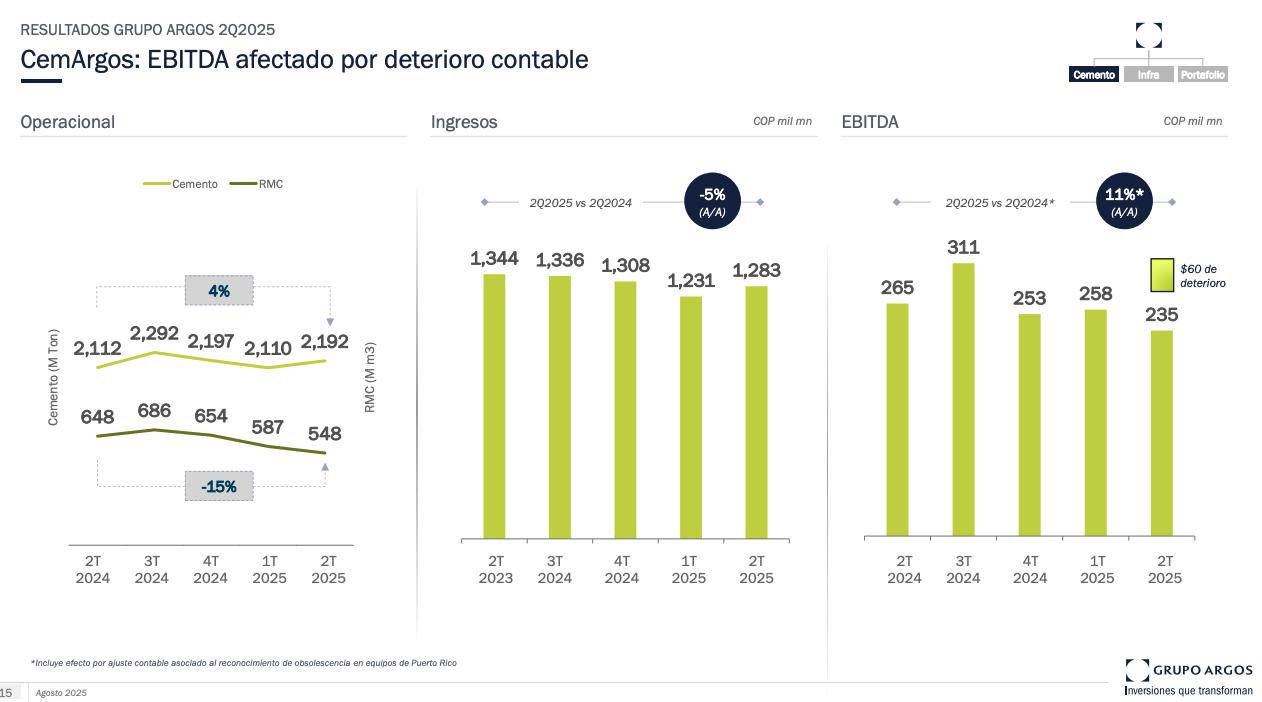



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 2 ---
Prompt: <image>
Convert the document to markdown.

Markdown Result:


# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

\[\begin{align*}
\text{Cemento (M ton)} & \\
2,112 & 648 \\
2,292 & 686 \\
2,197 & 654 \\
2,110 & 587 \\
2,192 & -15\% \\
\end{align*}\]

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{RMC (M m3)} & \\
1,344 & 1,336 \\
1,308 & 1,231 \\
1,283 & 1,231 \\
\end{align*}\]

- **-5% (A/A)**

### Ingresos

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{2T 2023} & 2,112 \\
\text{3T 2024} & 2,292 \\
\text{4T 2025} & 2,197 \\
\text{1T 2025} & 2,110 \\
\text{2T 2025} & 2,192 \\
\end{align*}\]

- **-15\%**

### EBITDA

- **2Q2025 vs 2Q2024**

\[\begin{align*}
\text{Cemento (M ton)} & \\
311 & 265 \\
253 & 253 \\
258 & 235 \\
\end{align*}\]

- **11\%* (A/A)**

- **$60 de deterioro**

### GRUPO ARGOS

- **Inversiones que transforman**


Image with Bounding Boxes:


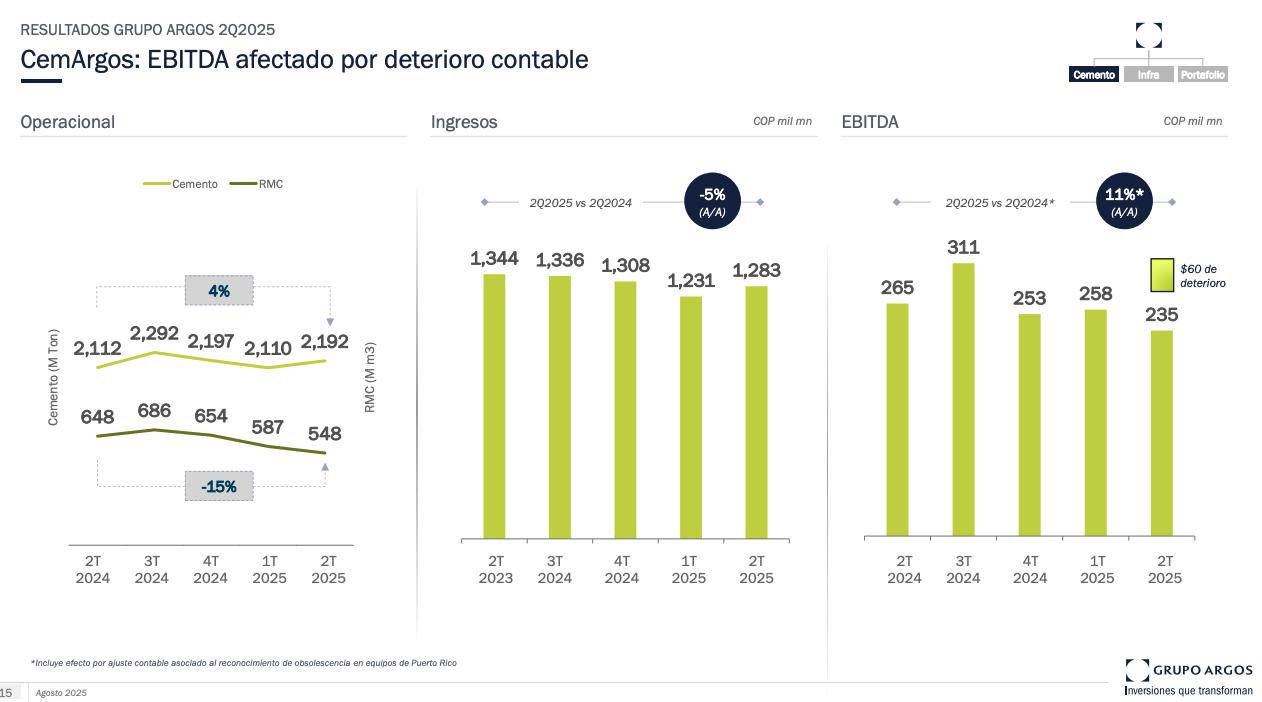



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 3 ---
Prompt: <image>
Parse the figure.

Markdown Result:


The image displays a bar chart titled "RESULTADOS GRUPO ARGOS 2Q2025" which translates to "RESULTS OF THE GROUP ARGOS 2Q2025." The chart is divided into two main sections: "Flujo de Caja" (Cash Flow) and "Notas" (Notes).

In the "Flujo de Caja" section, there are two bars for each of the following categories: "Dividendos netos" (Net Dividends), "Ingresos NDU" (Net Income from Derivative Instruments), "Compra/venta acciones" (Purchase/Issue of Shares), "Egresos GA" (Net Earnings from General Activities), "Egresos NDU" (Net Income from Derivative Instruments), "Impuestos" (Taxes), "FCO" (Foreign Currency Operations), "Intereses netos" (Net Interest), "Créditos netos" (Net Credit Operations), "Otros ing. - egr. neto" (Other Income - Other), "Caja inicial (dic-24)" (Initial Capital (December 24)), "Caja final (jun-25)" (Final Capital (June 25)), and "Rentabilidad" (Profitability).

Each bar is labeled with the corresponding amount in millions of euros. The bars are color-coded: blue for "Dividendos netos," green for "Ingresos NDU," and red for "Impuestos."

The "Notas" section contains a list of points related to the chart, including the date "27,574," the amount "270,676," and a note about the "COP mn" (million euros) and the "COP mn" (million euros) in the "COP mn" column.

The background of the chart is white, with the bars and text in shades of blue, green, and red. The text is primarily in black, with the exception of the "COP mn" column, which is in blue. The layout is clean and organized, with clear demarcations between the sections.


Image with Bounding Boxes:


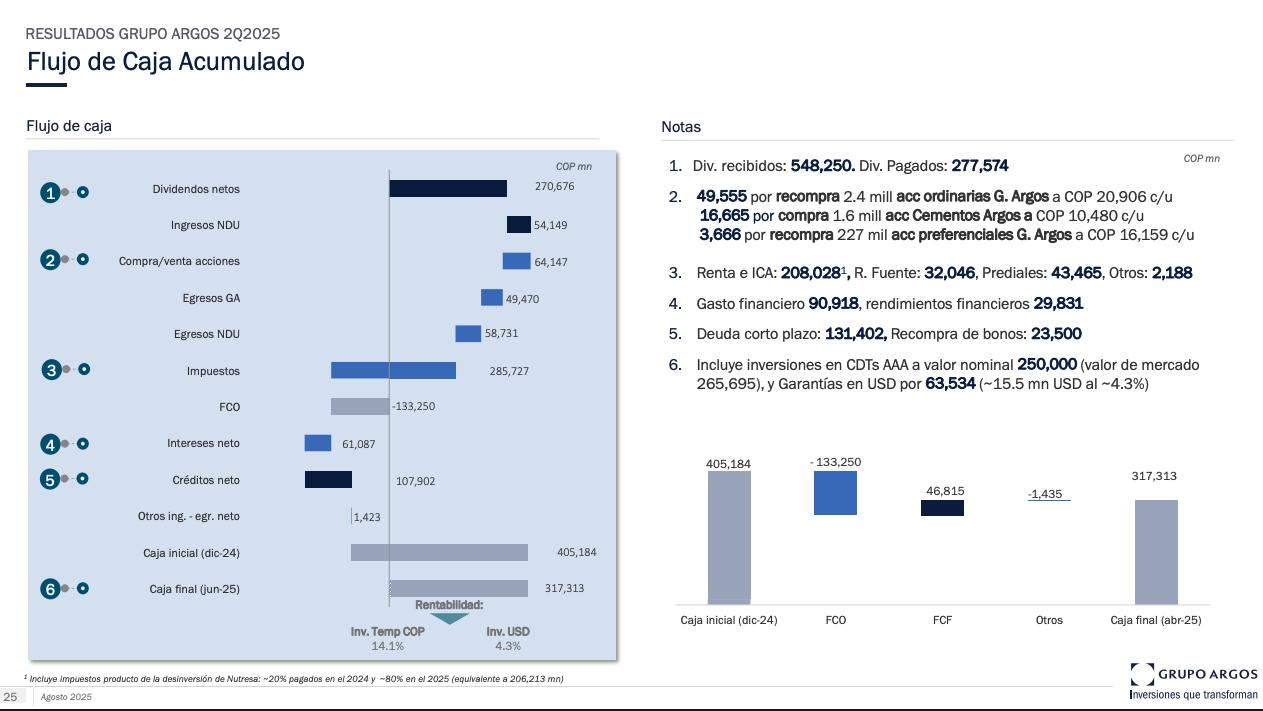



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 4 ---
Prompt: <image>
identify all objects in the image and output them in bounding boxes.

Markdown Result:



Image with Bounding Boxes:


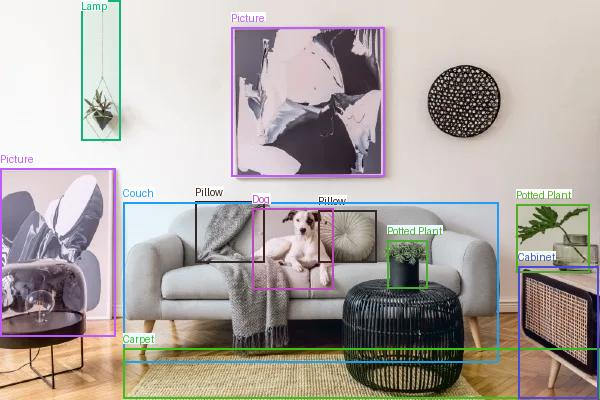



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 5 ---
Prompt: <image>
Locate <|ref|> icecream <|/ref|> in the image.

Markdown Result:



Image with Bounding Boxes:


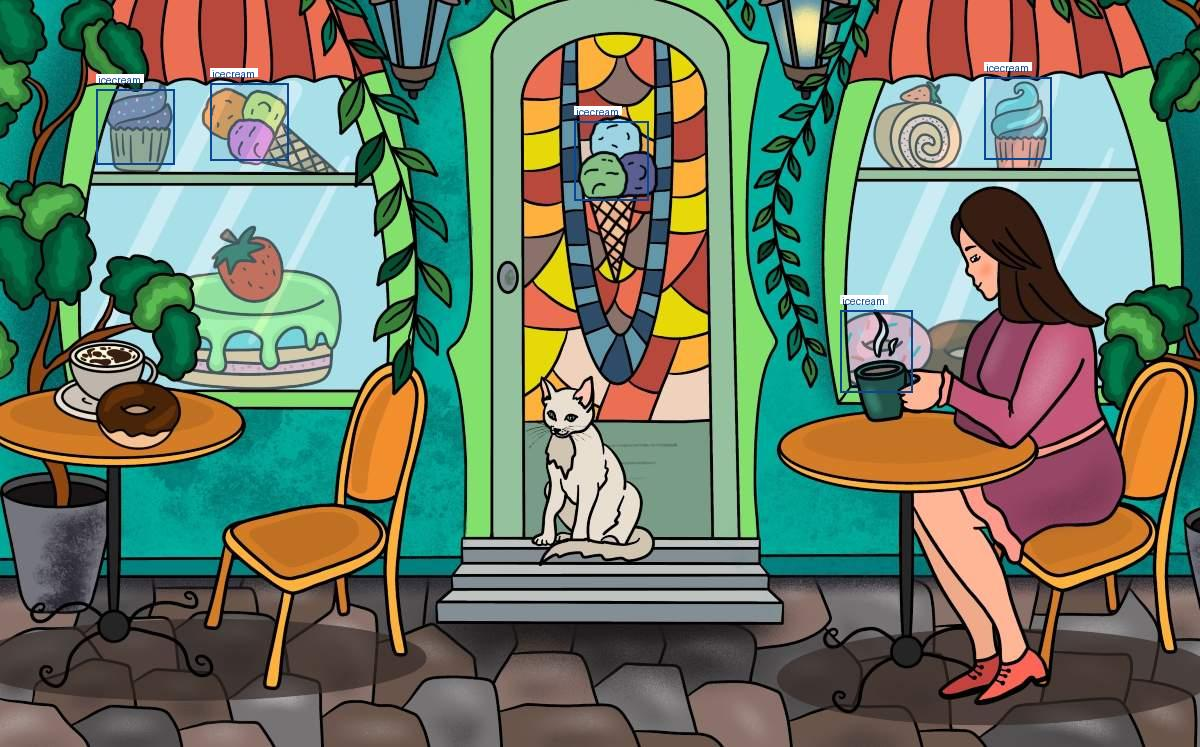



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 6 ---
Prompt: <image>
Locate <|ref|> X=6 <|/ref|> in the image.

Markdown Result:



Image with Bounding Boxes:


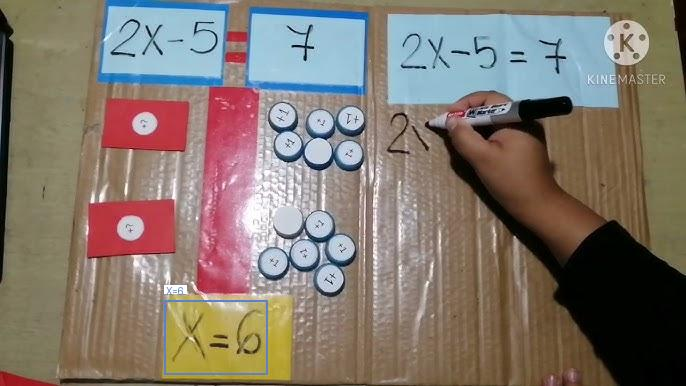



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 7 ---
Prompt: <image>
Describe this image in detail.

Markdown Result:


A financial chart of the S&P 500 index. The chart is in a candlestick format, with each candlestick representing a one-day period. The candlesticks are color-coded based on the price of the index, with green candlesticks indicating an increase in price and red candlesticks indicating a decrease in price. The chart is also annotated with various technical indicators, such as the moving averages and the Bollinger Bands. The chart is in a downtrend, with the price making lower highs and lower lows. The chart is also in a consolidation phase, with the price range between 1,400 and 1,450. The chart is in a bearish trend, with the price making lower highs and lower lows. The chart is also in a downtrend, with the price making lower highs and lower lows. The chart is in a consolidation phase, with the price range between 1,400 and 1,450.

The image is a screenshot of a trading platform. The platform is used to trade financial instruments, such as stocks, bonds, and commodities. The platform is used by traders to buy and sell these instruments. The platform is also used by investors to track the performance of these instruments.


Image with Bounding Boxes:


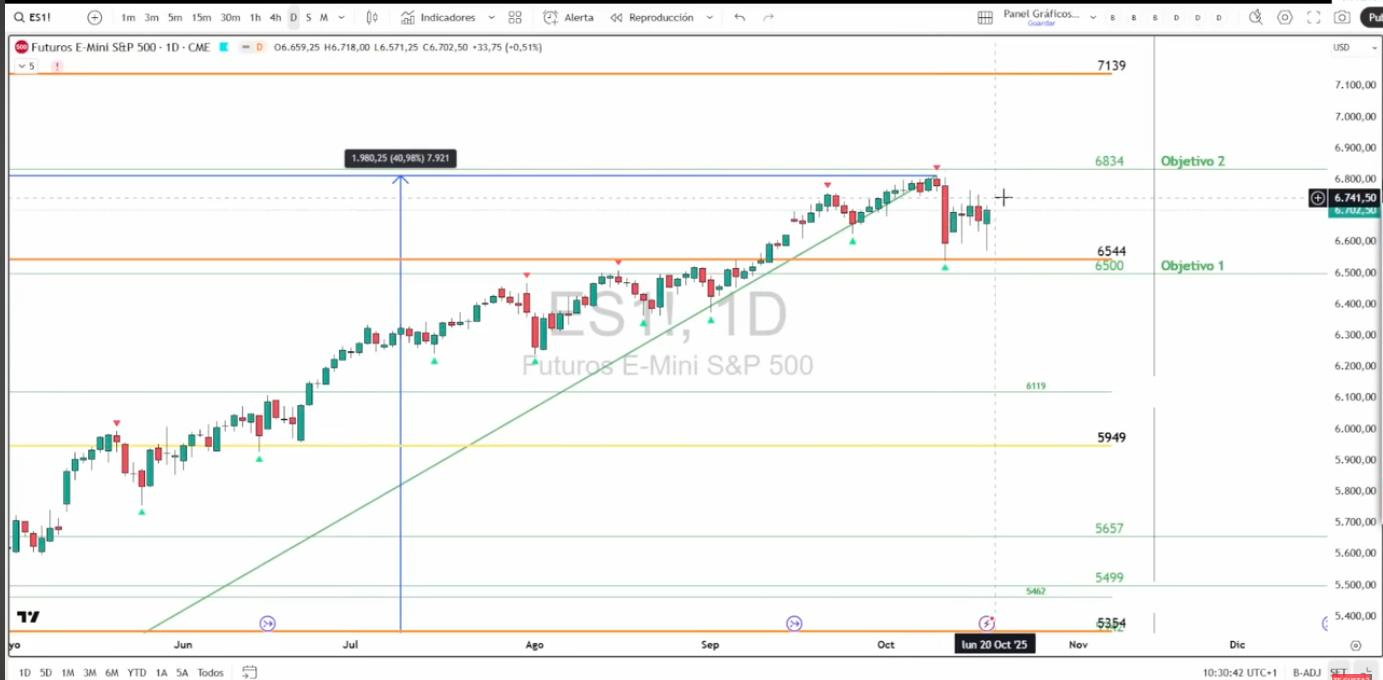

In [5]:
from IPython.display import display, Markdown, Image
import os

for i, result in enumerate(inference_results):
    print("\n")
    print("------"*20)
    print(f"\n--- Results for Inference {i+1} ---")
    print(f"Prompt: {result['prompt']}") # Display the prompt
    output_path = result['output_path']

    # Construct paths for markdown and image files
    markdown_file_path = os.path.join(output_path, 'result.mmd')
    image_file_path = os.path.join(output_path, 'result_with_boxes.jpg')

    # Display markdown content
    print("\nMarkdown Result:")
    try:
        with open(markdown_file_path, 'r') as f:
            markdown_content = f.read()
        display(Markdown(markdown_content))
    except FileNotFoundError:
        print(f"Error: The markdown file was not found at {markdown_file_path}")
    except Exception as e:
        print(f"An error occurred while reading the markdown file: {e}")

    # Display image with bounding boxes
    print("\nImage with Bounding Boxes:")
    try:
        display(Image(filename=image_file_path))
    except FileNotFoundError:
        print(f"Error: The image file was not found at {image_file_path}")
    except Exception as e:
        print(f"An error occurred while displaying the image: {e}")